In [1]:
import numpy as np

### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = ax1+bx2+cx3+d+gaussian(0,epsilon)

In [7]:
Number_of_points = 1000
X_data = np.linspace(-10,10,Number_of_points)
W0_true = 11
W1_true = 4.5
W2_true = 3
W3_true = 4
Y_data = W3_true*np.power(X_data,3)+W2_true*X_data**2 + W1_true*X_data + W0_true + np.random.normal(0,0.5,Number_of_points)

### Split the data into training and testing set

In [8]:
Number_of_training = int(Number_of_points*0.8)
Number_of_testing = int(Number_of_points*0.2)
index = np.random.permutation(Number_of_points) #A random permutation of 1..N is generated

In [9]:
X_train = X_data[index[:Number_of_training]] 
Y_train = Y_data[index[:Number_of_training]]

In [10]:
X_test = X_data[index[Number_of_training:]]
Y_test = Y_data[index[Number_of_training:]]

### Plot the data points

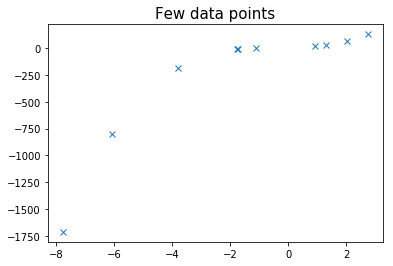

In [14]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x')
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
def plot_curve(x,y,W0,W1,W2,W3,title):
    fig,(ax1) = plt.subplots(1)
    ax1.plot(x,y,'x',color = 'blue',markersize=1)
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W0 + W1*x +W2*x**2 + W3*x**3
    ax1.plot(x,y,'o',color = 'red',markersize=1)
    #ax1.plot([X_data[0],X_data[-1]],[W0_true+W1_true*X_data[0],W0_true+W1_true*X_data[-1]])
    #ax1.plot([X_data[0],X_data[-1]],[W0+W1*X_data[0],W0+W1*X_data[-1]])

    
plot(X_train[0:10],Y_train[0:10],'Few data points')

### Fitting a 3rd order polynomial  of type y = W0 + W1*x +W2* x^2 + W3* x^3. 
We want to learn the parameters W0,W1,W2 and W3. Lets initialize them with random values

In [15]:

def compute_loss(x,y,W0,W1,W2,W3):
    return np.sum(np.power(W0+W1*x+W2*x**2  +W3*np.power(x,3) - y,2))/(2.0*Number_of_training)
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$

Epoch : 0\1000 Train loss: 265571.6457362885
Epoch : 50\1000 Train loss: 1364.8043006412988
Epoch : 100\1000 Train loss: 242.2095616702838
Epoch : 150\1000 Train loss: 94.73499283406147
Epoch : 200\1000 Train loss: 75.17071646243141
Epoch : 250\1000 Train loss: 72.38589623137185
Epoch : 300\1000 Train loss: 71.80319134435774
Epoch : 350\1000 Train loss: 71.51044639240871
Epoch : 400\1000 Train loss: 71.25683290896566
Epoch : 450\1000 Train loss: 71.0094432446474
Epoch : 500\1000 Train loss: 70.76395504877401
Epoch : 550\1000 Train loss: 70.5197956128354
Epoch : 600\1000 Train loss: 70.276884109523
Epoch : 650\1000 Train loss: 70.03520426317763
Epoch : 700\1000 Train loss: 69.79474829564496
Epoch : 750\1000 Train loss: 69.55550957334155
Epoch : 800\1000 Train loss: 69.31748164259142
Epoch : 850\1000 Train loss: 69.08065810293064
Epoch : 900\1000 Train loss: 68.84503259033112
Epoch : 950\1000 Train loss: 68.61059877484423


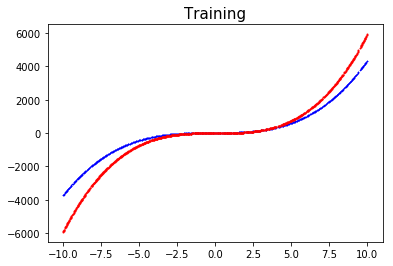

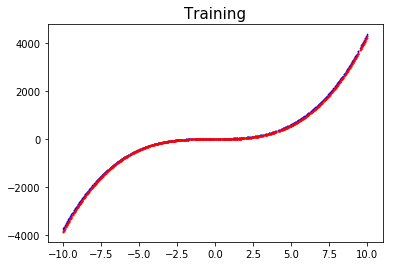

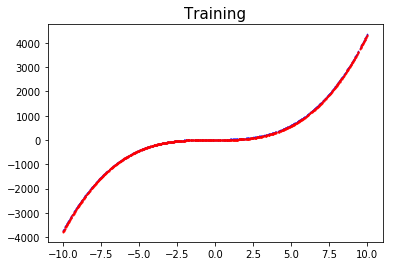

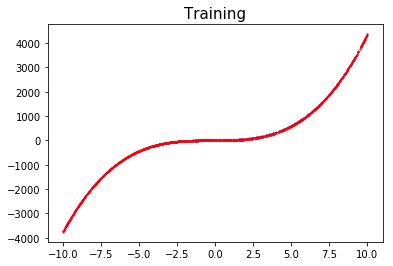

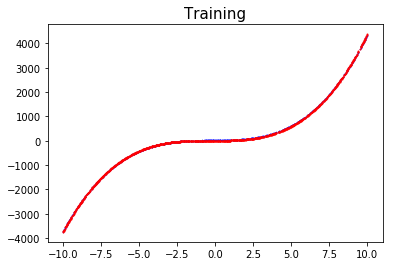

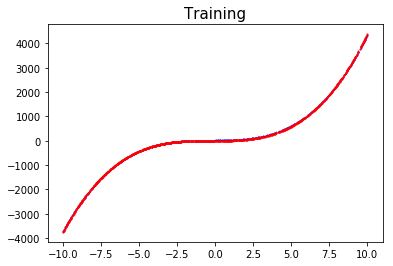

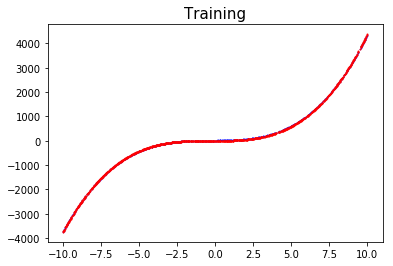

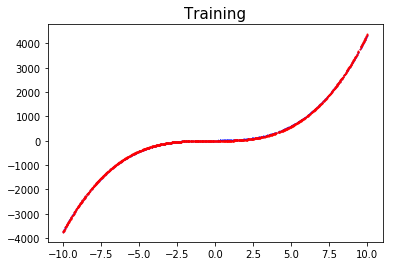

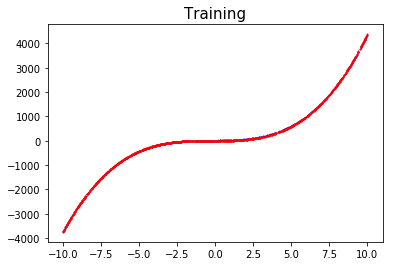

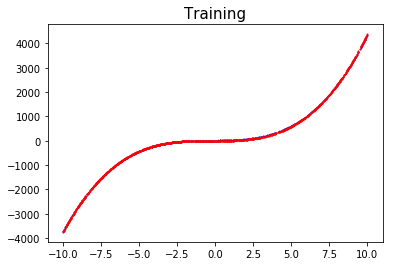

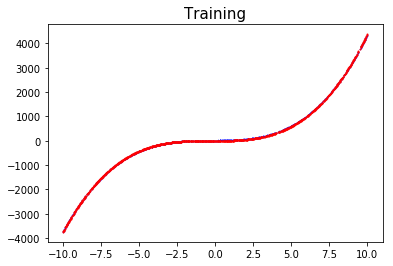

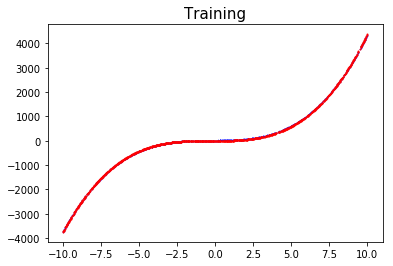

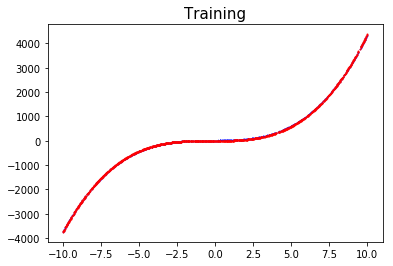

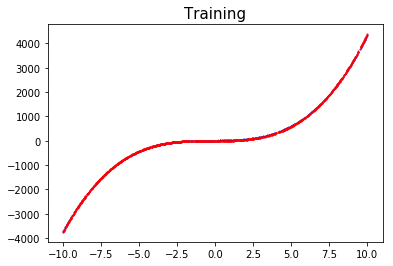

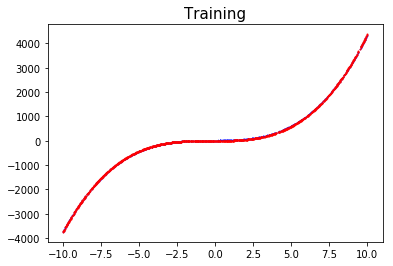

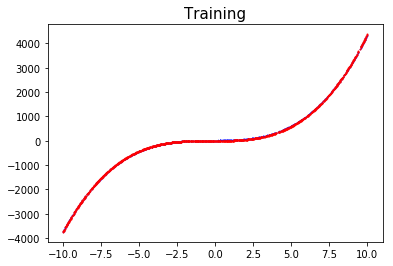

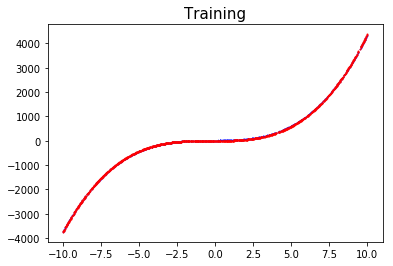

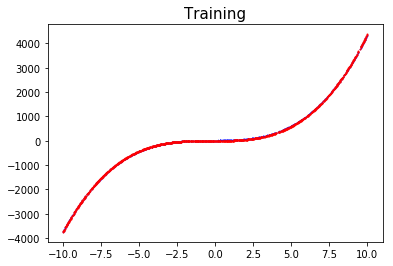

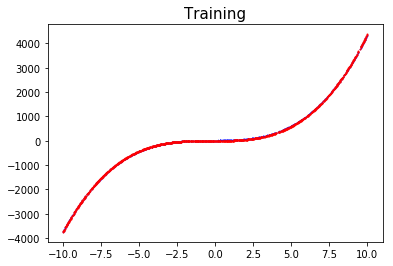

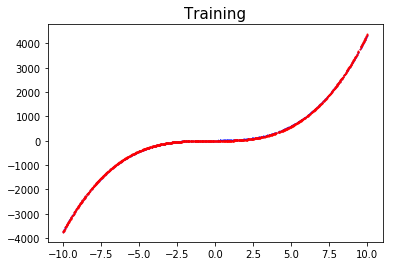

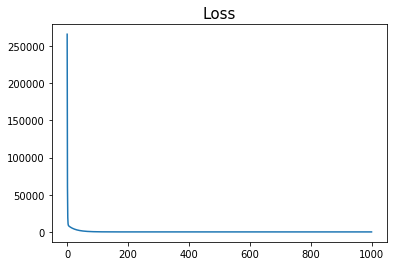

In [20]:
Epochs = 1000
learning_rate = 0.00001
W0 = np.random.normal(0,0.2,1)
W1 = np.random.normal(0,0.2,1)
W2 = np.random.normal(0,0.2,1)
W3 = np.random.normal(0,0.2,1)
Loss = []
for epoch in range(Epochs):
    dW0 = 0;dW1 = 0;dW2 = 0;dW3 = 0
    for n in range(Number_of_training):
        dW0 = dW0 + (W0 + W1*X_train[n] + W2*X_train[n]**2 + W3*X_train[n]**3 - Y_train[n])*1
        dW1 = dW1 + (W0 + W1*X_train[n] + W2*X_train[n]**2 + W3*X_train[n]**3 - Y_train[n])*X_train[n]
        dW2 = dW2 + (W0 + W1*X_train[n] + W2*X_train[n]**2 + W3*X_train[n]**3 - Y_train[n])*X_train[n]**2
        dW3 = dW3 + (W0 + W1*X_train[n] + W2*X_train[n]**2 + W3*X_train[n]**3 - Y_train[n])*X_train[n]**3 
    W0 = W0 - learning_rate*dW0/Number_of_training
    W1 = W1 - learning_rate*dW1/Number_of_training
    W2 = W2 - learning_rate*dW2/Number_of_training
    W3 = W3 - learning_rate*dW3/Number_of_training
    Loss.append(compute_loss(X_train,Y_train,W0,W1,W2,W3))
    if epoch%50==0:   
        plot_curve(X_train,Y_train,W0,W1,W2,W3,'Training')
        print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W0,W1,W2,W3)))
        
        


plot(range(len(Loss)),Loss,'Loss')
    
        
    
        


### Learning a 2nd order polynomial y = W0 + W1*x +W2* x^2

In [10]:
(2*3)**3

216

In [15]:
2*3**3

54